In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from  scipy.signal import butter, filtfilt 
import neurokit2 as nk  # Make sure it works after our debugging earlier
import pywt

In [57]:
df = pd.read_csv("101.csv")

In [58]:
df.info

<bound method DataFrame.info of         'sample #'  'MLII'  'V1'
0                0     955   992
1                1     955   992
2                2     955   992
3                3     955   992
4                4     955   992
...            ...     ...   ...
649995      649995     966  1004
649996      649996     965   999
649997      649997     965  1002
649998      649998     966  1002
649999      649999    1024  1024

[650000 rows x 3 columns]>

In [59]:
df.head()

,'sample #','MLII','V1'
0,0,955,992
1,1,955,992
2,2,955,992
3,3,955,992
4,4,955,992


In [60]:
print(df.columns)

Index([''sample #'', ''MLII'', ''V1''], dtype='object')


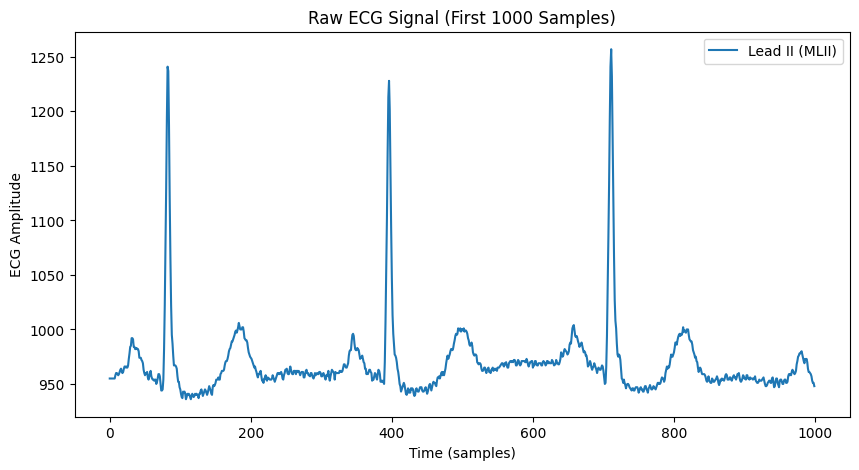

In [61]:
# Rename columns for easier access
df.columns = ["sample", "MLII", "V1"]

# Plot ECG signal
plt.figure(figsize=(10, 5))
plt.plot(df["sample"][:1000], df["MLII"][:1000], label="Lead II (MLII)")  # First 1000 samples for visibility
plt.xlabel("Time (samples)")
plt.ylabel("ECG Amplitude")
plt.title("Raw ECG Signal (First 1000 Samples)")
plt.legend()
plt.show()

In [62]:
print(df.columns)
#plt.draw() #ensures plot is drawn
#plt.savefig('myplot.png', dpi=300)  # Save as PNG with high resolution

Index(['sample', 'MLII', 'V1'], dtype='object')


In [63]:
t = df["sample"]/360 #time samples, converted into seconds
signal = df["MLII"]  # Lead II ECG signal
# Detect peaks (QRS detection)

refractory_period = int(0.2 * 360)
peaks, properties = find_peaks(signal, height=1000, distance=refractory_period, prominence=200)  # 200ms min spacing

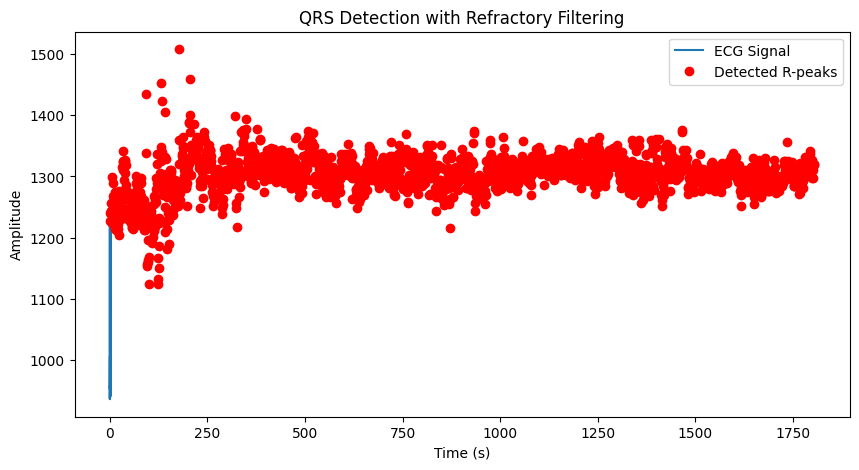

In [64]:
# Plot the ECG signal with detected peaks
plt.figure(figsize=(10, 5))
plt.plot(t[:1000], signal[:1000], label='ECG Signal')
plt.plot(t[peaks], signal[peaks], 'ro', label='Detected R-peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('QRS Detection with Refractory Filtering')
plt.legend()
plt.show()

In [65]:
print("Detected peaks:", peaks)

Detected peaks: [    82    396    711 ... 649003 649371 649750]


In [66]:
# Extract the ECG signal and convert time to seconds
ecg_signal = df["MLII"]  # Using Lead II
sampling_rate = 360  # Hz, make sure this is correct

In [67]:
# Process ECG with NeuroKit2
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)  # Denoise ECG
peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)  # Find R-peaks

In [68]:
# Convert sample indices to time in seconds
time = df["sample"] / sampling_rate  # Convert indices to time

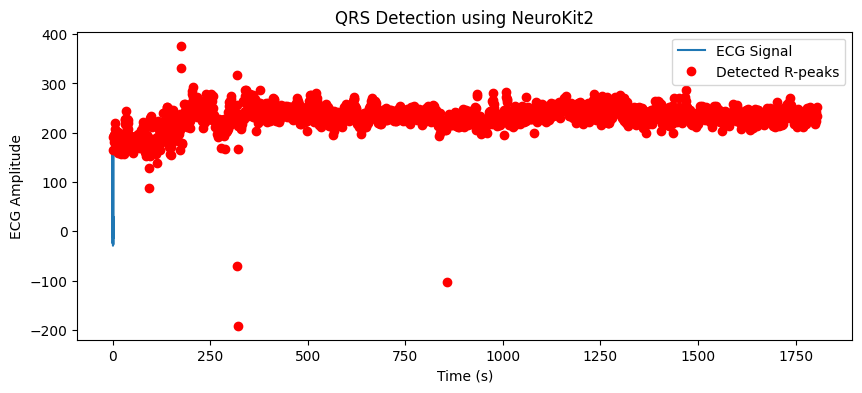

In [69]:
# Plot ECG with detected R-peaks
plt.figure(figsize=(10, 4))
plt.plot(time[:1000], ecg_cleaned[:1000], label="ECG Signal")  # First 1000 samples
plt.plot(time[peaks["ECG_R_Peaks"] == 1], ecg_cleaned[peaks["ECG_R_Peaks"] == 1], 'ro', label="Detected R-peaks")
plt.xlabel("Time (s)")
plt.ylabel("ECG Amplitude")
plt.title("QRS Detection using NeuroKit2")
plt.legend()
plt.show()

ARGHHH! ok, GUESS THAT DID NOT WORK LET'S TRY SOMETHING ELSE
THIS!(is a crafting table XD sorry mb force of habbit),,, anw This link is called filtering signals. Go check Kaggle link
Kaggle: https://www.kaggle.com/code/sammydamz/filtering-signals/notebook

In [70]:
x = df.iloc[:,0] #Time samples
y1 = df.iloc[:,1] #MLII signal
y2 = df.iloc[:,2] # V1 signal

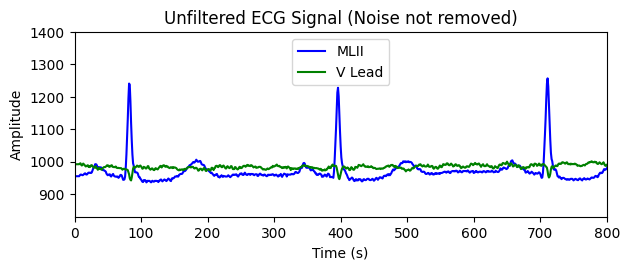

In [71]:
plt.subplot(2, 1,2)
plt.plot(x, y1, label='MLII', color='blue')

plt.plot(x, y2, label='V Lead', color='green')
plt.title('Unfiltered ECG Signal (Noise not removed)')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.legend()
plt.xlim(0,800) # Adjust this for x-axis zoom
plt.ylim(830, 1400) # Adjust this for y-axis zoom

plt.tight_layout()
plt.show()

APPLYING BYPASS FILTER:

In [72]:
fs = 500 
def bandpass_filter2(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, y2 )
    return y
def bandpass_filter1(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    z = filtfilt(b, a, y1 )
    return z

In [73]:
lowcut = 0.5  # Lower bound frequency (Hz)
highcut = 45  # Upper bound frequency (Hz)
filtered_signal2 = bandpass_filter2(df, lowcut, highcut, fs)
filtered_signal1 = bandpass_filter1(df, lowcut, highcut, fs)

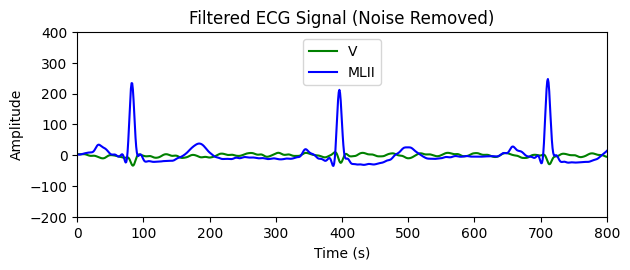

In [74]:
plt.subplot(2, 1, 2)
plt.plot(x, filtered_signal2, label='V', color='green')
plt.plot(x, filtered_signal1, label='MLII', color='blue')
plt.title('Filtered ECG Signal (Noise Removed)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 800)
plt.ylim(-200, 400)
plt.tight_layout()
plt.show()

In [75]:
 lowcut = 0.5  # Lower bound frequency (Hz)
 highcut = 45  # Upper bound frequency (Hz)
 filtered_signal2 = bandpass_filter2(df, lowcut, highcut, fs)
 filtered_signal1 = bandpass_filter1(df, lowcut, highcut, fs)

In [76]:
# Visualize original and filtered signals
time = np.arange(0, len(df) / fs, 1 / fs)  # Time axis
time

array([0.000000e+00, 2.000000e-03, 4.000000e-03, ..., 1.299994e+03,
       1.299996e+03, 1.299998e+03])

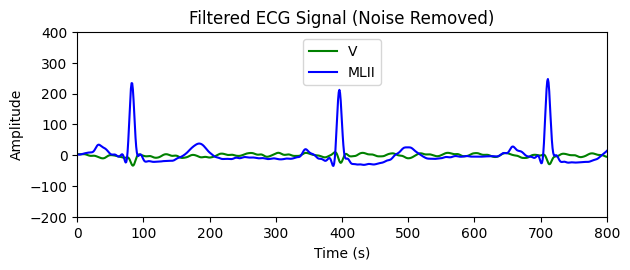

In [77]:
plt.subplot(2, 1, 2)
plt.plot(x, filtered_signal2, label='V', color='green')
plt.plot(x, filtered_signal1, label='MLII', color='blue')
plt.title('Filtered ECG Signal (Noise Removed)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 800)
plt.ylim(-200, 400)
plt.tight_layout()
plt.show()

DETECT QRS PEAKS

In [78]:
# Detect peaks (QRS detection)

refractory_period = int(0.2 * 360)
peaks, properties = find_peaks(signal, height=1000, distance=refractory_period, prominence=200)  # 200ms min spacing

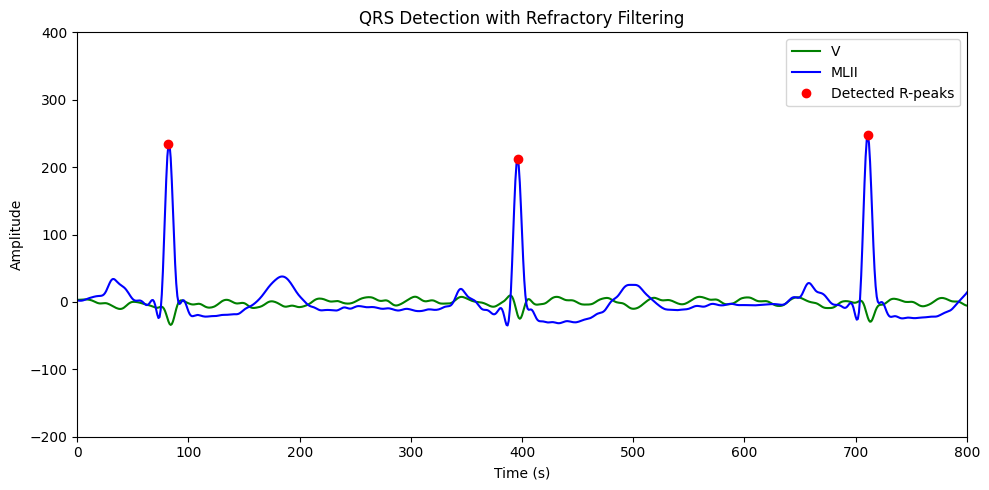

In [79]:
# Plot the ECG signal with detected peaks
plt.figure(figsize=(10, 5))
plt.plot(x, filtered_signal2, label='V', color='green')
plt.plot(x, filtered_signal1, label='MLII', color='blue')
#plt.plot(x[peaks], filtered_signal2[peaks], 'ro', label='Detected R-peaks')
plt.plot(x[peaks], filtered_signal1[peaks], 'ro', label='Detected R-peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('QRS Detection with Refractory Filtering')
plt.legend()
plt.xlim(0, 800)
plt.ylim(-200, 400)
plt.tight_layout()
plt.show()

In [80]:
print('Detected peaks:', peaks)

Detected peaks: [    82    396    711 ... 649003 649371 649750]


WAVELET DENOISING

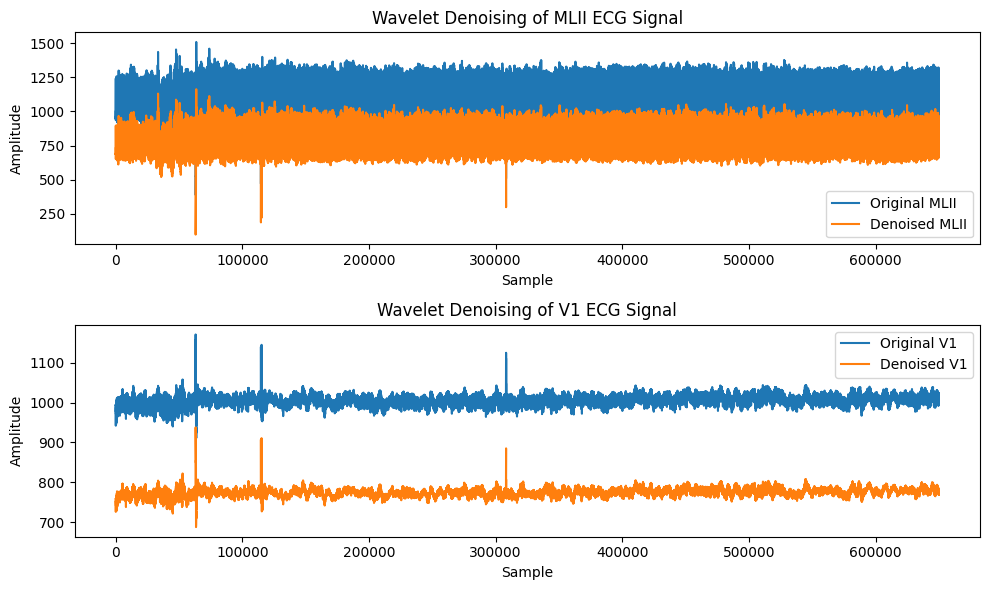

In [81]:
wavelet = 'db4'  
level = 4  
threshold = 0.2 

coeffs1 = pywt.wavedec(y1, wavelet, level=level)
coeffs_thresholded1 = [pywt.threshold(c, threshold*max(c)) for c in coeffs1]
denoised_y1 = pywt.waverec(coeffs_thresholded1, wavelet)

coeffs2 = pywt.wavedec(y2, wavelet, level=level)
coeffs_thresholded2 = [pywt.threshold(c, threshold*max(c)) for c in coeffs2]
denoised_y2 = pywt.waverec(coeffs_thresholded2, wavelet)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y1, label='Original MLII')
plt.plot(denoised_y1, label='Denoised MLII')
plt.title('Wavelet Denoising of MLII ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y2, label='Original V1')
plt.plot(denoised_y2, label='Denoised V1')
plt.title('Wavelet Denoising of V1 ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

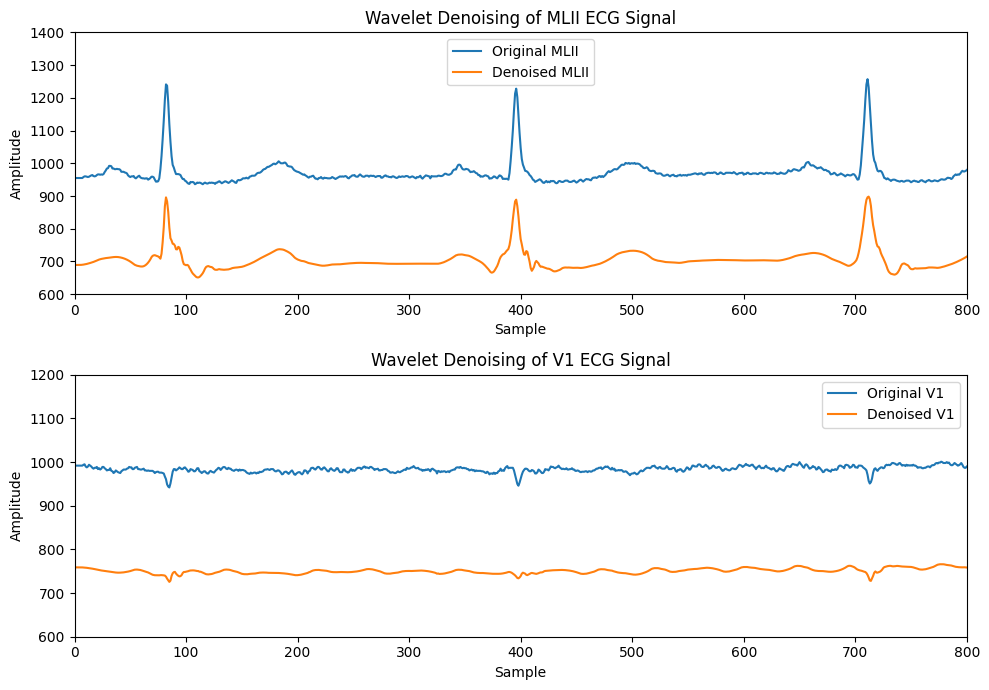

In [91]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 1, 1)
plt.plot(y1, label='Original MLII')
plt.plot(denoised_y1, label='Denoised MLII')
plt.title('Wavelet Denoising of MLII ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 800)
plt.ylim(600, 1400)

plt.subplot(2, 1, 2)
plt.plot(y2, label='Original V1')
plt.plot(denoised_y2, label='Denoised V1')
plt.title('Wavelet Denoising of V1 ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 800)
plt.ylim(600, 1200)

plt.tight_layout()
plt.show()

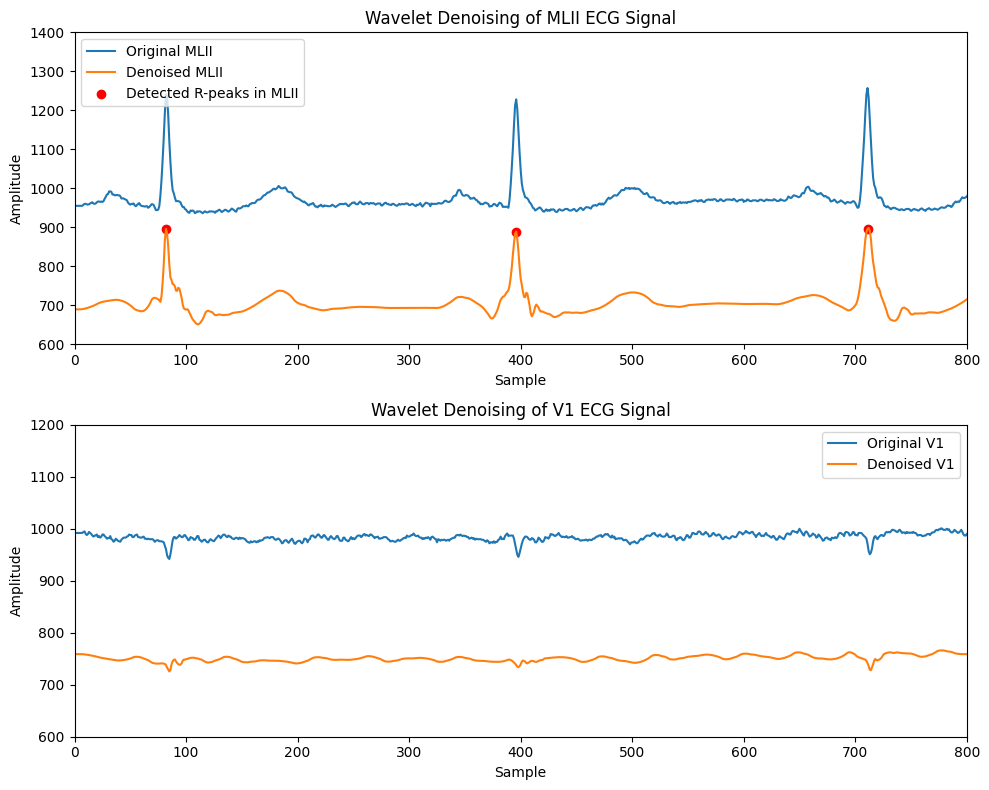

In [96]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(y1, label='Original MLII')
plt.plot(denoised_y1, label='Denoised MLII')
plt.scatter(x[peaks], denoised_y1[peaks], color='red', label='Detected R-peaks in MLII', marker='o')
#plt.plot(x[peaks], denoised_y1[peaks], label='Detected R-peaks in MLII')
plt.title('Wavelet Denoising of MLII ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 800)
plt.ylim(600, 1400)

plt.subplot(2, 1, 2)
plt.plot(y2, label='Original V1')
plt.plot(denoised_y2, label='Denoised V1')
plt.title('Wavelet Denoising of V1 ECG Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, 800)
plt.ylim(600, 1200)

plt.tight_layout()
plt.show()